In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 데이터 로드
금융 데이터 로드를 위한 Finance DataReader 모듈 설치

In [2]:
# !pip install -U finance-datareader

In [3]:
import FinanceDataReader as fdr

df = fdr.DataReader('BTC/USD')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414063,68330.414063,7.067047e+10
2024-03-05,68341.054688,69170.625000,59323.910156,63801.199219,63801.199219,1.028029e+11
2024-03-06,63776.050781,67637.929688,62848.671875,66106.804688,66106.804688,6.875023e+10
2024-03-07,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-08,66931.398438,66975.617188,66931.398438,66953.453125,66953.453125,4.690351e+10


### freq에 원하는 시계열 데이터의 주기를 입력할 수 있습니다.

* 참고링크: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [4]:
# 주간(Weekly) 데이터만 추출하기 위하여 date_range()를 주 단위로 생성합니다.
target_index = pd.date_range('20130107', '20240205', freq='W-MON')
target_index

DatetimeIndex(['2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11',
               ...
               '2023-12-04', '2023-12-11', '2023-12-18', '2023-12-25',
               '2024-01-01', '2024-01-08', '2024-01-15', '2024-01-22',
               '2024-01-29', '2024-02-05'],
              dtype='datetime64[ns]', length=579, freq='W-MON')

In [5]:
# 추출한 시계열 인덱스 데이터로 필터링
df.loc[df.index.isin(target_index)].head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700
2014-10-06,320.389008,345.134003,302.559998,330.079010,330.079010,79011800
2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,35221400
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000
2014-10-27,354.777008,358.631989,349.808990,352.989014,352.989014,13033000
2014-11-03,325.569000,334.002014,325.480988,327.553986,327.553986,12948500
2014-11-10,362.265015,374.816010,357.561005,366.924011,366.924011,30450100
2014-11-17,388.348999,410.199005,377.502014,387.407990,387.407990,41518800


In [5]:
# 2020년 ~ 2023년 4년치의 시세 데이터를 조회합니다. (Close)는 종가를 의미
data = df.loc[(df.index >= '2020-01-01') & (df.index <= '2023-12-31'), 'Close']
data

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-12-27    43442.855469
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
Name: Close, Length: 1461, dtype: float64

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

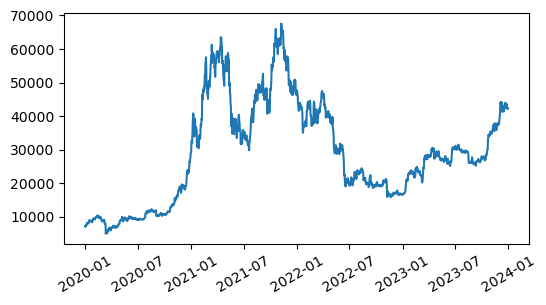

In [10]:
plt.figure(figsize=(6,3))
plt.plot(data.index, data.values)
plt.xticks(rotation  = 30)

In [34]:
diff_1 = data.diff(periods=2).iloc[1:]

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

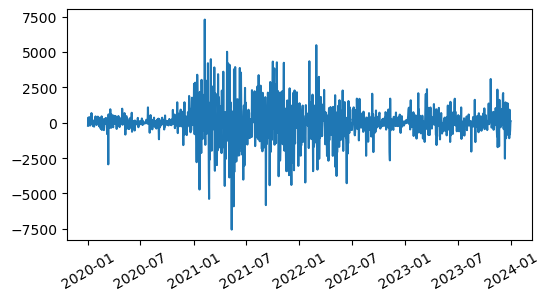

In [45]:
diff_1 = data.diff(periods=1).iloc[1:]
plt.figure(figsize=(6,3))
plt.plot(diff_1.index, diff_1.values)
plt.xticks(rotation  = 30)

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

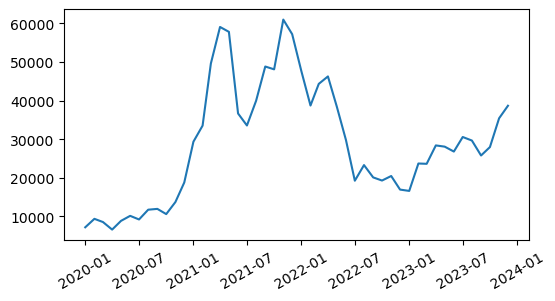

In [13]:
target_index = pd.date_range('20200101', '20231231', freq='MS')
data2 = data.loc[target_index]
plt.figure(figsize=(6,3))
plt.plot(data2.index, data2.values)
plt.xticks(rotation  = 30)

In [7]:
# 결측치 확인
data.isnull().sum()

0

In [8]:
# 평균 값으로 채우는 경우
data.fillna(data.mean())

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-12-27    43442.855469
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
Name: Close, Length: 1461, dtype: float64

In [9]:
# interpolation 방식으로 결측치를 채웁니다.
data = data.interpolate()
data

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-12-27    43442.855469
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
Name: Close, Length: 1461, dtype: float64

## 지수평활 (Exponential Smoothing)
### 지수평활(Exponential Smoothing) 은 시계열 데이터 분석에서 일반적으로 사용되는 기법 중 하나입니다. 이는 데이터의 패턴을 예측하는 데 도움이 되는, 데이터의 노이즈를 줄이고 추세를 더 잘 파악 할 수 있는 방법입니다.



### 지수평활의 기본적인 아이디어는 최근의 관찰값에 더 많은 가중치 를 주고, 과거의 관찰값에는 적은 가중치 를 주는 것입니다. ‘지수’라는 용어는 각 관찰값에 곱해지는 가중치가 지수적으로 감소하기 때문에 사용됩니다.



### 이 방법은 다음과 같은 이유로 사용됩니다:

* 간단함: 지수평활은 계산이 간단하고 이해하기 쉬운 방법입니다. 이는 데이터가 복잡한 패턴이나 추세를 보이지 않을 때 특히 유용합니다.

* 노이즈 감소: 지수평활은 원래의 시계열 데이터에서 노이즈를 줄이고 주요한 패턴을 강조함으로써 데이터를 더 잘 이해하는 데 도움이 됩니다.

* 예측: 지수평활은 미래 값의 예측에 사용할 수 있습니다. 이 방법은 과거의 데이터를 사용하여 미래의 데이터를 예측하는 방법 중 하나로, 데이터의 패턴이 시간이 지남에 따라 일정하게 유지될 것으로 예상되는 경우 특히 유용합니다.

* 빠른 업데이트: 지수평활은 새로운 데이터가 추가될 때마다 쉽게 업데이트될 수 있습니다. 이는 특히 실시간 분석이 필요한 경우에 유용합니다.



### 지수평활에는 다양한 변형이 있습니다.

* 가장 간단한 형태의 지수평활은 단순 지수평활(Simple Exponential Smoothing, SES)이며, 이는 데이터에 선형적인 패턴이 없을 때 사용됩니다.
* 더 복잡한 형태의 지수평활은 홀트의 선형 지수평활(Holt's Linear Exponential Smoothing) 이나 홀트-윈터스의 계절적 지수평활(Holt-Winters' Seasonal Exponential Smoothing) 과 같이 트렌드와 계절성을 포함하는 데이터를 다룰 수 있습니다.

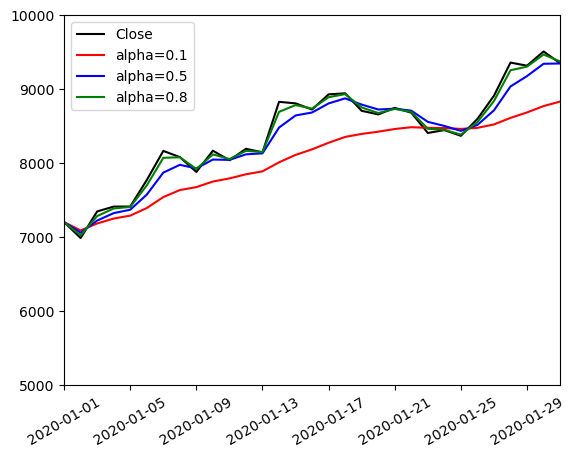

In [17]:
plt.plot(data,'k', label='Close')
plt.plot(data.ewm(alpha=0.1).mean(), 'r', label='alpha=0.1')
plt.plot(data.ewm(alpha=0.5).mean(), 'b', label='alpha=0.5')
plt.plot(data.ewm(alpha=0.8).mean(), 'g', label='alpha=0.8')

plt.xticks(rotation=30)
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-01-31'))
plt.ylim(5000, 10000)
plt.legend()
plt.show()

In [21]:
data.head()

Date
2020-01-01    7200.174316
2020-01-02    6985.470215
2020-01-03    7344.884277
2020-01-04    7410.656738
2020-01-05    7411.317383
Name: Close, dtype: float64

In [25]:
data.ewm(alpha=0.99).mean().head()

Date
2020-01-01    7200.174316
2020-01-02    6987.595998
2020-01-03    7341.311748
2020-01-04    7409.963289
2020-01-05    7411.303842
Name: Close, dtype: float64

## 이동평균(Moving Average)
### 이동 평균은 주어진 시점에서 이전 n 개의 데이터 포인트의 평균을 계산 하는 것을 의미합니다.

### 이는 시계열 데이터의 잡음을 줄이고 데이터의 기본적인 패턴을 확인하는 데 도움이 됩니다.



### 이동평균(moving average) 를 구하는 방식은 다음과 같습니다.



### (예시)

* 10일 이동평균을 계산
* data.rolling(window=10).mean()

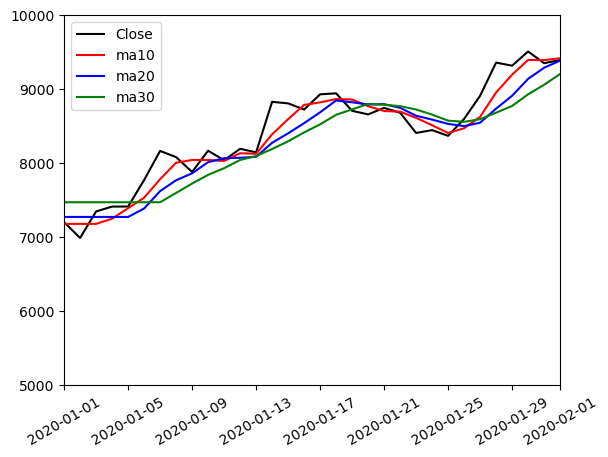

In [30]:
plt.plot(data,'k', label='Close')
plt.plot(data.rolling(window=3).mean().bfill(), 'r', label='ma10')
plt.plot(data.rolling(window=5).mean().bfill(), 'b', label='ma20')
plt.plot(data.rolling(window=7).mean().bfill(), 'g', label='ma30')

plt.xticks(rotation=30)
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-02-01'))
plt.ylim(5000,10000)
plt.legend()
plt.show()

## 정상성(stationary) / 비정상성(non-stationary)
<img src= https://t1.daumcdn.net/cfile/tistory/99E7CC3E5D13859D30>

### 정상 시계열 (stationary)
#### 정상 시계열은 시간의 흐름에 따라 그 통계적 특성이 변하지 않는 시계열 을 의미합니다.

#### 다시 말해, 정상 시계열의 평균과 분산(또는 표준편차), 그리고 공분산은 시간이 변해도 일정 합니다.



#### 이러한 특성 때문에 정상 시계열은 분석이 용이하며, 많은 통계적 시계열 모델들(AR, MA, ARMA 등)은 데이터가 정상성을 가정 하고 있습니다. (여기서, 정상성을 가정한다는 점이 매우 중요합니다!!)



#### (예시)

* 시간에 따른 일정한 주기를 가진 신호(일정한 주기로 진동하는 심장 박동)

* 백색 잡음(랜덤한 값들의 연속) 등이 있습니다.

### 비정상 시계열 (non-stationary)
#### 비정상 시계열은 시간의 흐름에 따라 그 통계적 특성이 변하는 시계열 을 의미합니다. 즉, 평균, 분산, 공분산 등이 시간에 따라 변화합니다.



#### 비정상 시계열 데이터는 시간의 흐름에 따라 통계적 속성이 변하는 데이터를 의미합니다. 이는 추세(trend) 또는 계절성(seasonality) 때문에 발생할 수 있습니다.

#### 추세(trend): 시계열 데이터가 시간에 따라 증가하거나 감소하는 경향 을 보일 때, 이를 추세 라고 합니다.

#### 계절성(seasonality): 시계열 데이터가 일정한 주기로 반복되는 패턴 을 보일 때, 이를 계절성 이라고 합니다.

#### 대부분의 실제 시계열 데이터는 비정상적인 성질을 가지고 있습니다. 이 경우에는 데이터를 정상적으로 만드는 변환(예: 차분, 로그 변환 등) 이 필요할 수 있습니다.



#### (예시)

* 시간에 따라 트렌드가 있는 주가 데이터

* 인구 증가 데이터 등

#### 이러한 데이터는 시간에 따라 평균과 분산이 변하기 때문에 비정상적(non-stationary) 입니다.

## 정상성(stationary) / 비정상성(non-stationary) 확인
### 시각화를 통한 확인
### ACF(Auto Correlation Function) Plot - 시각화
#### 링크: https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
### 분석 tip 1. 통계적 유의성 확인

* 자기 상관이 통계적으로 유의미한지 여부를 나타내는 “신뢰구간”을 회색 음영 영역(shading area) 으로 표시

* 기본적으로 95% 신뢰구간 을 사용하여 shading area를 그립니다.

* 각 Lag 에서 Shading 영역을 벗어나 자기상관계수(Autocorrelation) 추정치는 95% 신뢰구간을 벗어났기 때문에, 통계적 유의성을 찾을 수 없다 는 의미로 해석할 수 있습니다.

### 분석 tip 2. 정상성 확인

* 보통은 시차가 커질수록 상관계수는 점차 0에 가까워지며, 시차가 커질 수록 자기상관성이 떨어지는 양상을 보여주는 것이 일반적입니다. 하지만, Seasonal 한 데이터의 경우, 값이 다시 튀어오르는 현상은 있을 수 있습니다.

* ACF는 시계열 데이터의 정상성을 판단할 때 유용 하게 활용될 수 있습니다.

    * 빠르게 0으로 수렴하는 경우 -> 정상(stationary) 시계열, 천천히 감소합니다.

    * 큰 상관계수를 가지는 경우 비정상(non-stationary) 시계열 데이터로 평가할 수 있습니다.

### 수식

* ACF는 시계열 데이터의 lagged 복사본과 원본 사이의 상관 관계를 측정합니다.
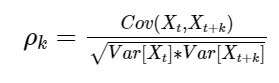

### PACF(Partial Autocorrelation Function) Plot - 시각화
* 시간차(lag)가 늘어나면서 관측치 간의 상관 관계가 어떻게 변하는지 설명 합니다.

* 원리적으로, PACF는 선형 회귀분석을 통해 계산됩니다. 각 시차의 관측치를 이전 시차들의 관측치로 선형 회귀분석 하고, 이때의 회귀 계수를 PACF로 간주합니다. 이렇게 하면, PACF는 이전 시차들의 영향을 배제하고 특정 시차만의 자기상관을 측정할 수 있습니다.

### 분석 tip 1. AR 모델의 차수 결정

* PACF를 사용하면 AR 모델의 차수 를 결정하는 데 도움이 될 수 있습니다.
### 수식

* PACF는 다른 모든 시점의 영향을 배제하고 두 시점 사이의 상관 관계를 측정합니다.
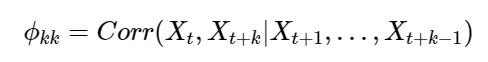

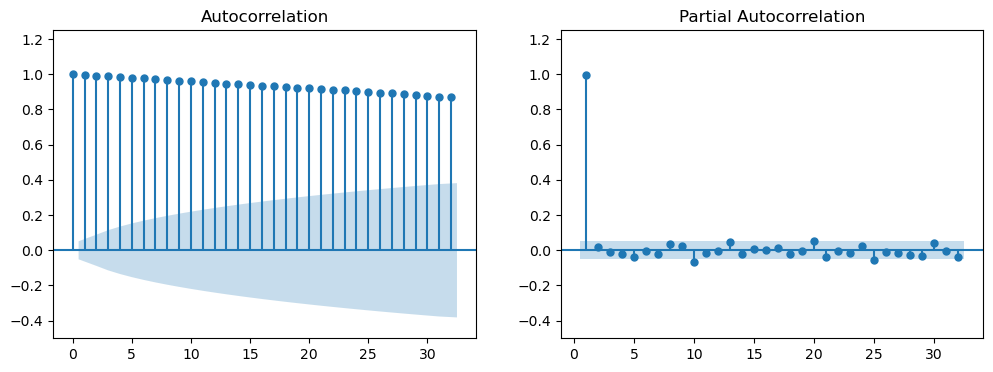

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# ACF Plot
plot_acf(data, ax=axes[0])
# PACF Plot
plot_pacf(data, zero=False, ax=axes[1])

for ax in axes:
    ax.set_ylim(-0.5, 1.25)
plt.show()

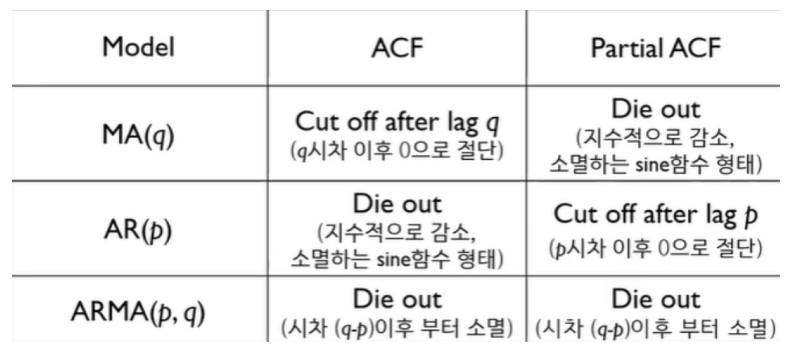

## 정상성 검증
### kpss test
* 귀무가설: 해당 시계열은 정상(stationary) 시계열이다. <-> 대립가설: 해당 시계열은 비정상(non-stationary) 시계열이다.

    * p-value <= 0.05 : 귀무가설 기각/ 대립가설 채택 -> 비정상(non-stationary) 시계열.

    * p-value > 0.05 : 귀무가설 채택/ 대립가설 기각 -> 정상(stationary) 시계열.

In [39]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    stats, p_value, nlags, critical_values = kpss(series, **kw)
    
    print(f'KPSS Stat: {stats:.5f}')
    print(f'p-value: {p_value:.2f}')
    print(f'Lags: {nlags}')
    
    print(f'검증결과: {"비정상(non-stationary)" if p_value <= 0.05 else "정상(stationary)"} 시계열 데이터입니다.')

In [40]:
kpss_test(data)

KPSS Stat: 1.02153
p-value: 0.01
Lags: 25
검증결과: 비정상(non-stationary) 시계열 데이터입니다.


C:\Users\admin\AppData\Local\Temp\ipykernel_12496\408452970.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p_value, nlags, critical_values = kpss(series, **kw)


In [41]:
# 1차 차분에 대한 결과
diff_1 = data.diff(periods=1).iloc[1:]

In [42]:
kpss_test(diff_1, nlags=30)

KPSS Stat: 0.12903
p-value: 0.10
Lags: 30
검증결과: 정상(stationary) 시계열 데이터입니다.


C:\Users\admin\AppData\Local\Temp\ipykernel_12496\408452970.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p_value, nlags, critical_values = kpss(series, **kw)


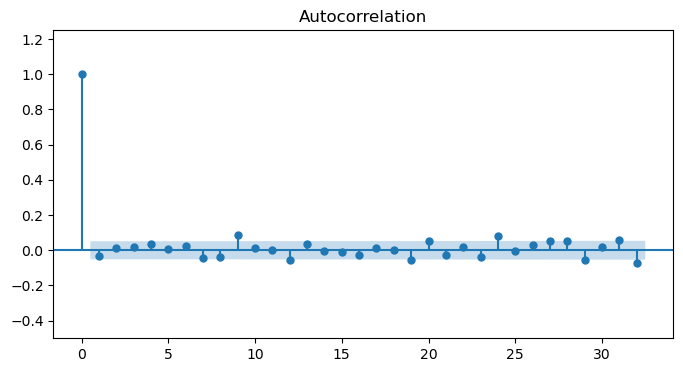

In [117]:
# 1차 차분 결과에 대한 시각화
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

# ACF Plot
plot_acf(diff_1, ax=axes)

axes.set_ylim(-0.5, 1.25)
plt.show()

## Adfuller 테스트
### kpss test 와 귀무가설이 반대입니다.

* 귀무가설: 해당 시계열은 비정상(non-stationary) 시계열이다. <-> 대립가설: 해당 시계열은 정상(stationary) 시계열이다.

    * p-value <= 0.05 : 귀무가설 기각/ 대립가설 채택 -> 정상(stationary) 시계열.

    * p-value > 0.05 : 귀무가설 채택/ 대립가설 기각 -> 비정상(non-stationary) 시계열.

In [118]:
# 데이터 정상 상태 수치 확인 
from statsmodels.tsa.stattools import adfuller #ADF Test를 위한 함수 호출 

st_result = adfuller(data)

In [119]:
def adfuller_test(series, **kw):    
    adf, p_value, nlags, number_of_observations, critical_values, _ = adfuller(series, **kw)
    
    print(f'ADF: {adf:.5f}')
    print(f'p-value: {p_value:.2f}')
    print(f'Lags: {nlags}')
    print(f'Number of Observations: {number_of_observations}')
    
    print(f'검증결과: {"비정상(non-stationary)" if p_value > 0.05 else "정상(stationary)"} 시계열 데이터입니다.')

In [120]:
# Adfuller 테스트
adfuller_test(data)

ADF: -1.74278
p-value: 0.41
Lags: 9
Number of Observations: 1451
검증결과: 비정상(non-stationary) 시계열 데이터입니다.


In [121]:
# 1차 차분에 대한 Adfuller 테스트
adfuller_test(diff_1)

ADF: -12.00948
p-value: 0.00
Lags: 8
Number of Observations: 1451
검증결과: 정상(stationary) 시계열 데이터입니다.


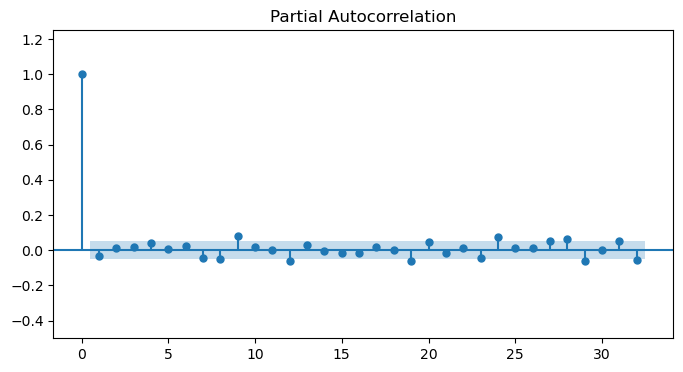

In [122]:
# 1차 차분 결과에 대한 시각화
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

# ACF Plot
plot_pacf(diff_1, ax=axes)

axes.set_ylim(-0.5, 1.25)
plt.show()

## ARIMA Model
### 시계열 데이터 분석에서는 AR(AutoRegressive), MA(Moving Average), ARMA(AutoRegressive Moving Average), ARIMA(AutoRegressive Integrated Moving Average) 등의 모델이 있습니다.

* AR (AutoRegressive): 이전 관측치의 값들이 현재 관측치에 영향을 주는 모델입니다. 예를 들어, AR(1) 모델은 현재 관측치가 바로 이전 관측치에 의해 영향을 받는다는 것을 나타냅니다. AR 모델은 파라미터 p로 몇 개의 이전 관측치를 고려할지를 결정합니다.

* MA (Moving Average): 이전 오차항들이 현재 관측치에 영향을 주는 모델입니다. MA(1) 모델은 현재 관측치가 바로 이전의 오차항에 의해 영향을 받는다는 것을 나타냅니다. MA 모델은 파라미터 q로 몇 개의 이전 오차항을 고려할지를 결정합니다.

* AR & MA 모델의 차이
AR(AutoRegressive) 모델과 MA(Moving Average) 모델은 둘 다 시계열 분석에서 널리 사용되는 모델이지만, 그 방식이 다릅니다.


### AR 모델

* AR 모델은 ‘자기회귀 모델’ 로, 과거의 자신의 값에 의존하여 현재 값을 예측하는 방법을 사용합니다. 즉, 이전 시점의 관측값이 현재 시점의 관측값에 영향을 줍니다.
* 예를 들어, 주식 시장에서 어제 주가가 상승했다면 오늘 주가도 상승할 가능성이 있다는 것 이 AR 모델의 관점입니다.

### AR 모델은 파라미터 p로 이전 몇 개의 관측치를 고려할지 결정 하게 됩니다. AR(1) 모델은 바로 이전의 한 단계 관측치를 고려하고, AR(2) 모델은 바로 이전의 두 단계 관측치를 고려하게 됩니다.



### (예시)

* 예를 들어, 전력 소비를 예측하는 문제를 생각해 보겠습니다. 사람들은 특정 시간대에 일관되게 전력을 사용하는 경향이 있습니다. 아침에 사람들이 일어나서 활동을 시작하면 전력 사용량이 증가하고, 밤에 사람들이 잠에 들면 전력 사용량이 감소합니다. 이러한 경우, AR 모델은 이전 시간대의 전력 사용 패턴을 학습하여 다음 시간대의 전력 사용량을 예측하는 데 사용 될 수 있습니다.



### MA 모델

* MA 모델은 ‘이동 평균 모델’ 로, 과거의 오차항에 의존하여 현재 값을 예측합니다.
* 예를 들어, 우리가 날씨를 예측한다고 가정해 봅시다. 오늘의 기온 예측치가 실제 기온보다 더 높았다면, 이는 오차를 의미합니다. MA 모델에 따르면, 이 오차는 내일의 기온 예측에 반영되어야 합니다. 즉, 오늘 예측이 너무 높았다면, 내일의 예측치는 그 오차를 보정하기 위해 조금 더 낮아질 것입니다.


### MA 모델은 파라미터 q로 이전 몇 개의 오차항을 고려할지 결정하게 됩니다. MA(1) 모델은 바로 이전의 한 단계 오차항 을 고려하고, MA(2) 모델은 바로 이전의 두 단계 오차항 을 고려하게 됩니다.

### 즉, AR 모델은 자신의 과거 값을, MA 모델은 과거의 예측 오차를 사용하여 현재 값을 예측하는 방법론입니다. 어떤 모델을 사용할지는 주로 데이터의 특성과 목표에 따라 결정됩니다.



### (예시)

* 매장의 판매량 예측을 예로 들어 보겠습니다. 이전의 판매 예측이 과소평가되었다면 (즉, 실제 판매량이 예측보다 높았다면), 그 다음날의 판매량 예측을 증가시키는 것이 합리적일 수 있습니다. 반대로, 이전의 판매 예측이 과대평가 되었다면 (즉, 실제 판매량이 예측보다 낮았다면), 그 다음날의 판매량 예측을 감소시키는 것이 합리적 일 수 있습니다. 이런 상황에서는 MA 모델이 유용하게 사용될 수 있습니다.

### ARMA, ARIMA
* ARMA (AutoRegressive Moving Average): AR 모델과 MA 모델의 결합으로, 이전 관측치와 이전 오차항 모두를 고려하는 모델입니다. ARMA 모델은 두 파라미터 p와 q를 모두 사용합니다.

* ARIMA (AutoRegressive Integrated Moving Average): ARMA 모델에 비정상 시계열을 정상 시계열로 변환하는 과정을 포함한 모델입니다. 이 변환 과정은 차분(differencing)이라고 하며, 몇 차 차분을 사용할지를 결정하는 파라미터가 d입니다. 따라서 ARIMA 모델은 세 파라미터 p, d, q를 모두 사용합니다.

### ARIMA 적용시 고려사항

* AR(p) = ARIMA(p, 0, 0)

* MA(q) = ARIMA(0, 0, q)

* ARMA(p, q) = ARIMA(p, 0, q)

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
model = ARIMA(data, order=(2,2,2)).fit()
model.summary()

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1461
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -12354.020
Date:                Fri, 08 Mar 2024   AIC                          24718.041
Time:                        11:27:05   BIC                          24744.469
Sample:                    01-01-2020   HQIC                         24727.900
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0270      1.036     -0.991      0.322      -3.058       1.004
ar.L2         -0.0271      0.033     -0.828      0.408      -0.091       0.037
ma.L1      -9.952e-05      1.038  -9.59e-05      1.000      -2.034       2.034
ma.L2         -0.9999      1.039     -0.963      0.336      -3.036       1.036
sigma2      1.316e+06   2.72e-08   4.84e+13      0.000    1.32e+06    1.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2621.16
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.86e+28. Standard errors may be unstable.
"""

In [50]:
model.forecast(steps=100)

2024-01-01    42289.564908
2024-01-02    42316.576637
2024-01-03    42343.157204
2024-01-04    42370.109173
2024-01-05    42396.691397
                  ...     
2024-04-05    44832.678344
2024-04-06    44859.262337
2024-04-07    44886.212456
2024-04-08    44912.796487
2024-04-09    44939.746569
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [51]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

p = range(0, 4)
d = range(0, 3)
q = range(0, 5)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total=len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = ARIMA(data, order=(i)).fit()
            aic.append(round(model.aic, 2))
            params.append((i))
        except:
            continue 

100%|██████████████████████████████████████| 60/60 [00:28<00:00,  2.10it/s]


### 가장 Optimal 한 (p, d, q) 하이퍼 파라미터를 찾습니다.

In [56]:
optimal

[((2, 2, 3), 24703.5)]

In [55]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
arima = ARIMA(data, order = optimal[0][0], freq='D').fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1461
Model:                 ARIMA(2, 2, 3)   Log Likelihood              -12345.749
Date:                Fri, 08 Mar 2024   AIC                          24703.498
Time:                        11:34:28   BIC                          24735.211
Sample:                    01-01-2020   HQIC                         24715.328
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9005      0.016   -117.728      0.000      -1.932      -1.869
ar.L2         -0.9699      0.017    -58.692      0.000      -1.002      -0.938
ma.L1          0.8790      0.026     33.384      0.000       0.827       0.931
ma.L2         -0.9333      0.027    -34.865      0.000      -0.986      -0.881
ma.L3         -0.9449      0.025    -37.663      0.000      -0.994      -0.896
sigma2      1.328e+06   2.87e-08   4.63e+13      0.000    1.33e+06    1.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2426.61
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.65e+28. Standard errors may be unstable.
"""

In [59]:
y_test = df.loc[(df.index >= '2024-01-01') & (df.index <= '2024-2-29'), 'Close']

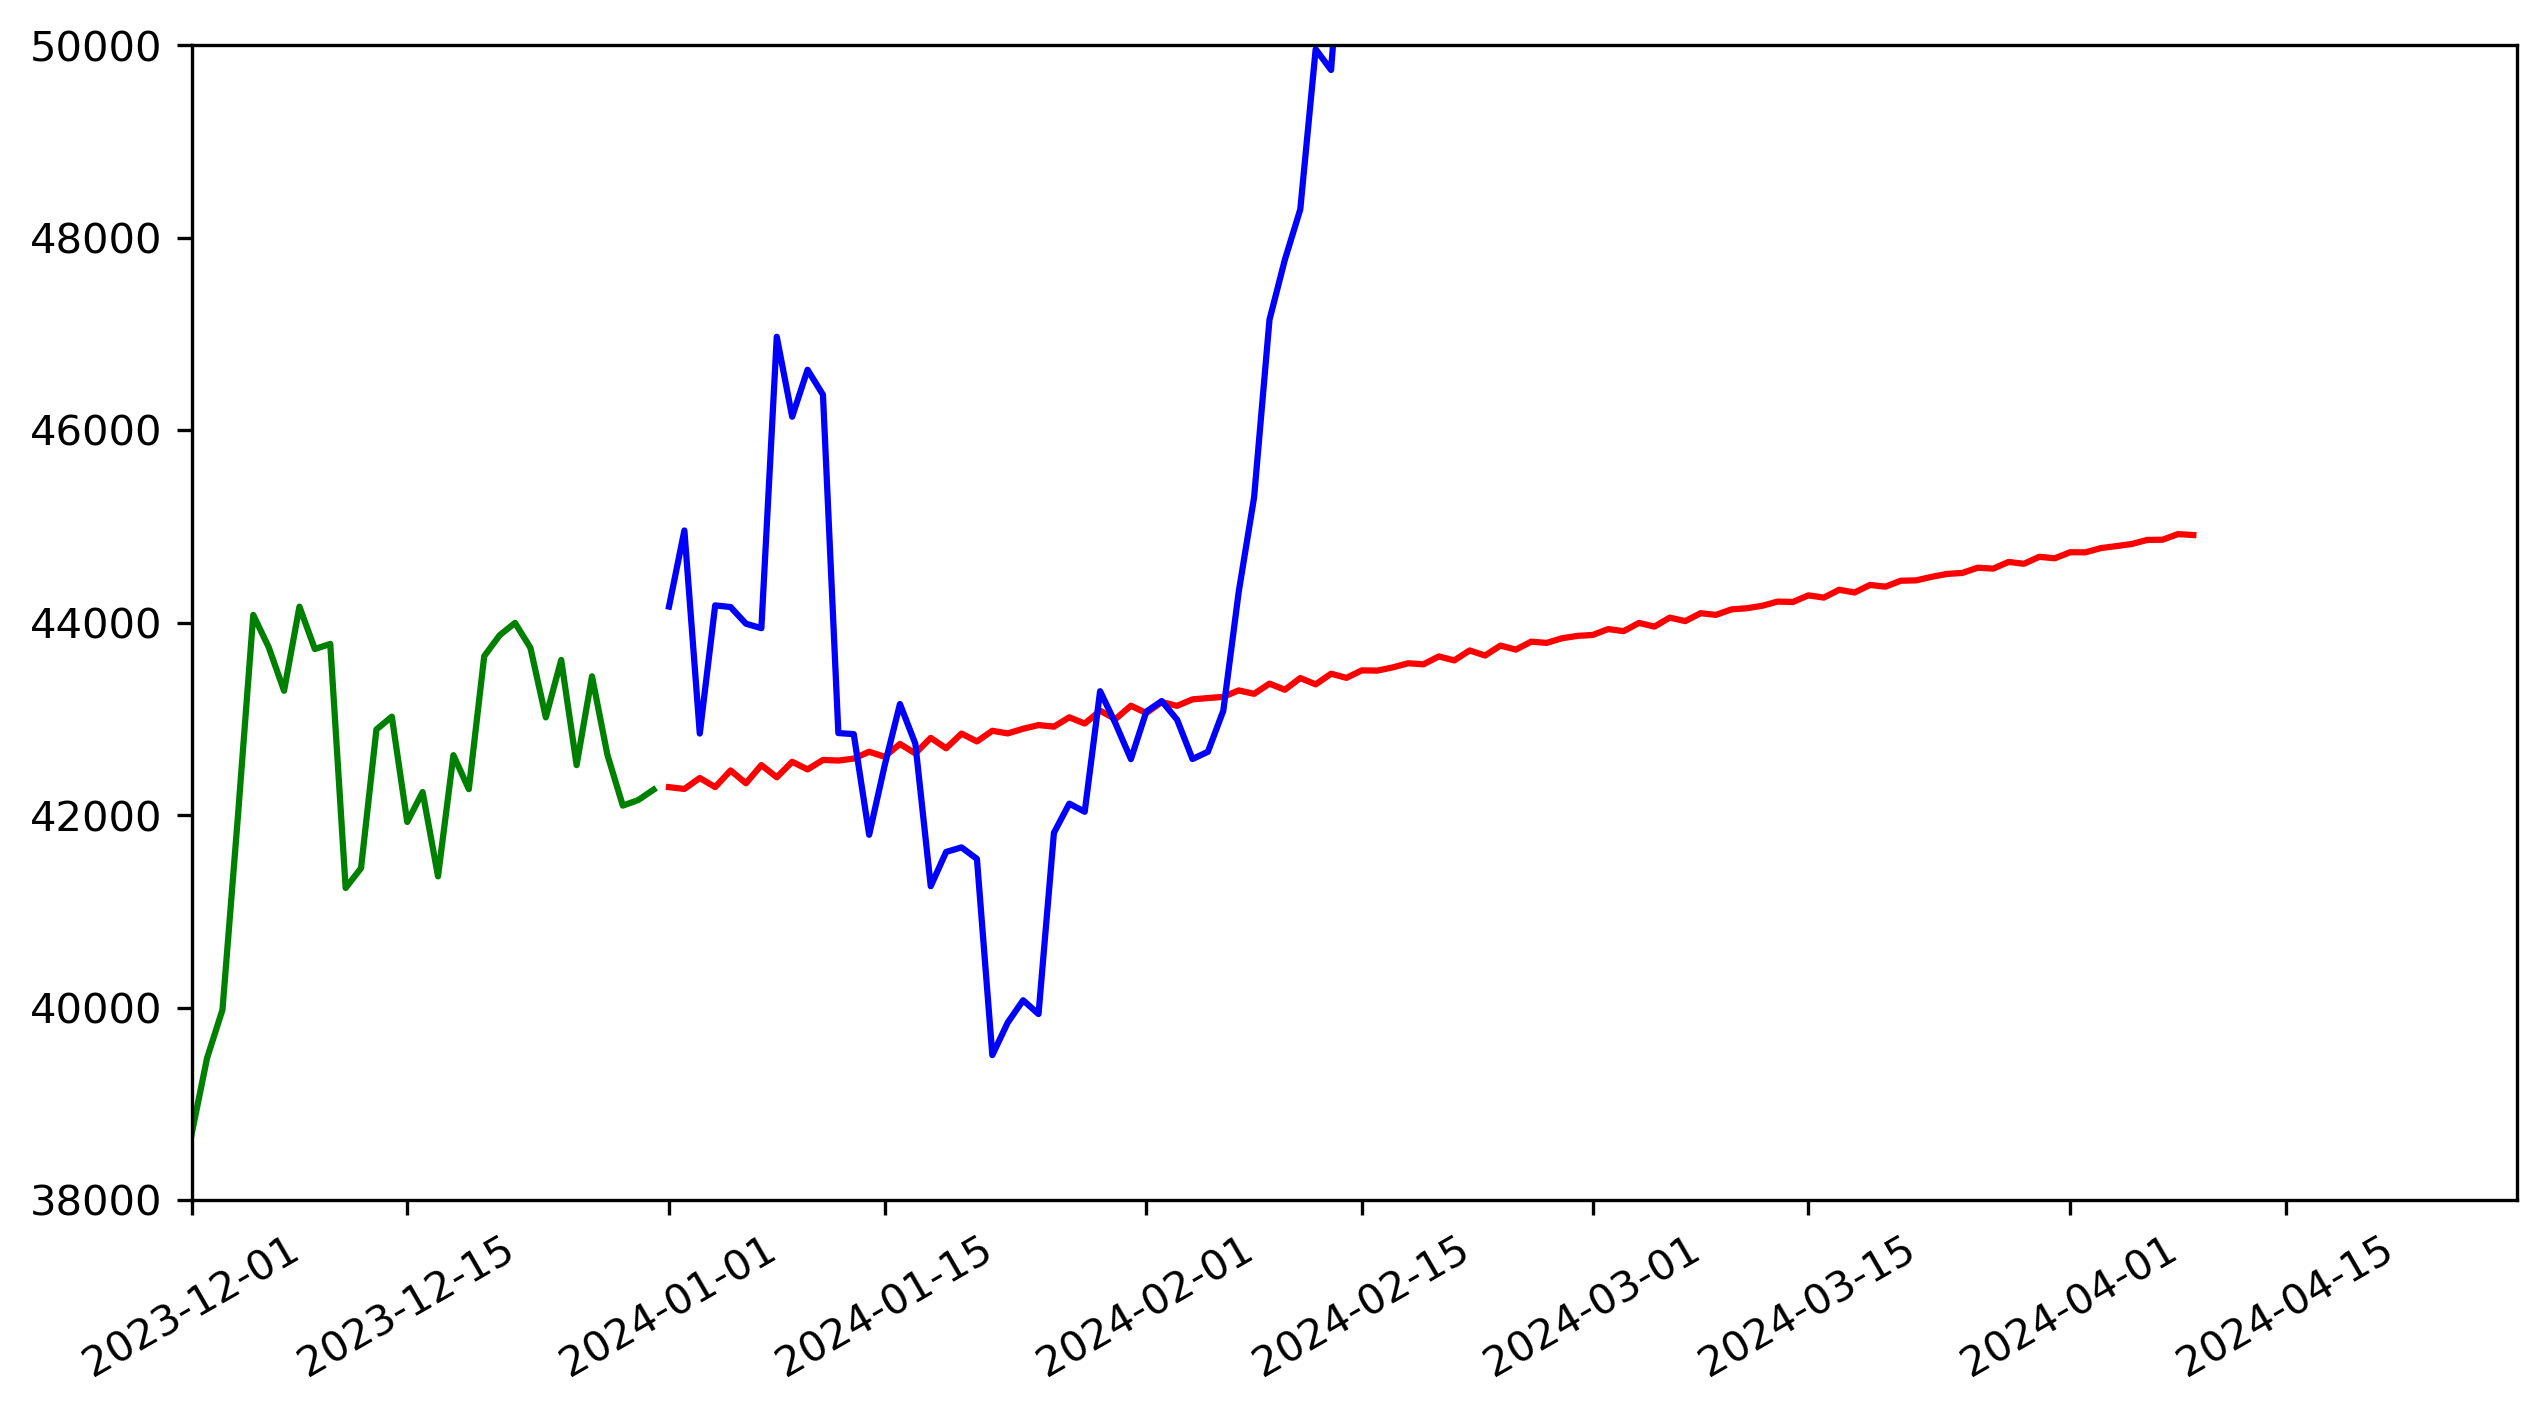

In [62]:
arima_model = ARIMA(data, order=optimal[0][0], freq='D').fit()
forecast = arima_model.forecast(steps=100)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 5)
fig.set_dpi(300)
ax.plot(data.index, data, color='green')
ax.plot(forecast, color='red')
ax.plot(y_test, color='blue')
plt.xticks(rotation=30)
plt.xlim(pd.Timestamp('2023-12-01'), pd.Timestamp('2024-04-30'))
plt.ylim(38000, 50000)
plt.show()

### 결과를 시각화 합니다. 다음의 시각화 결과는 향후 15일 치 데이터에 대한 예측 결과입니다.

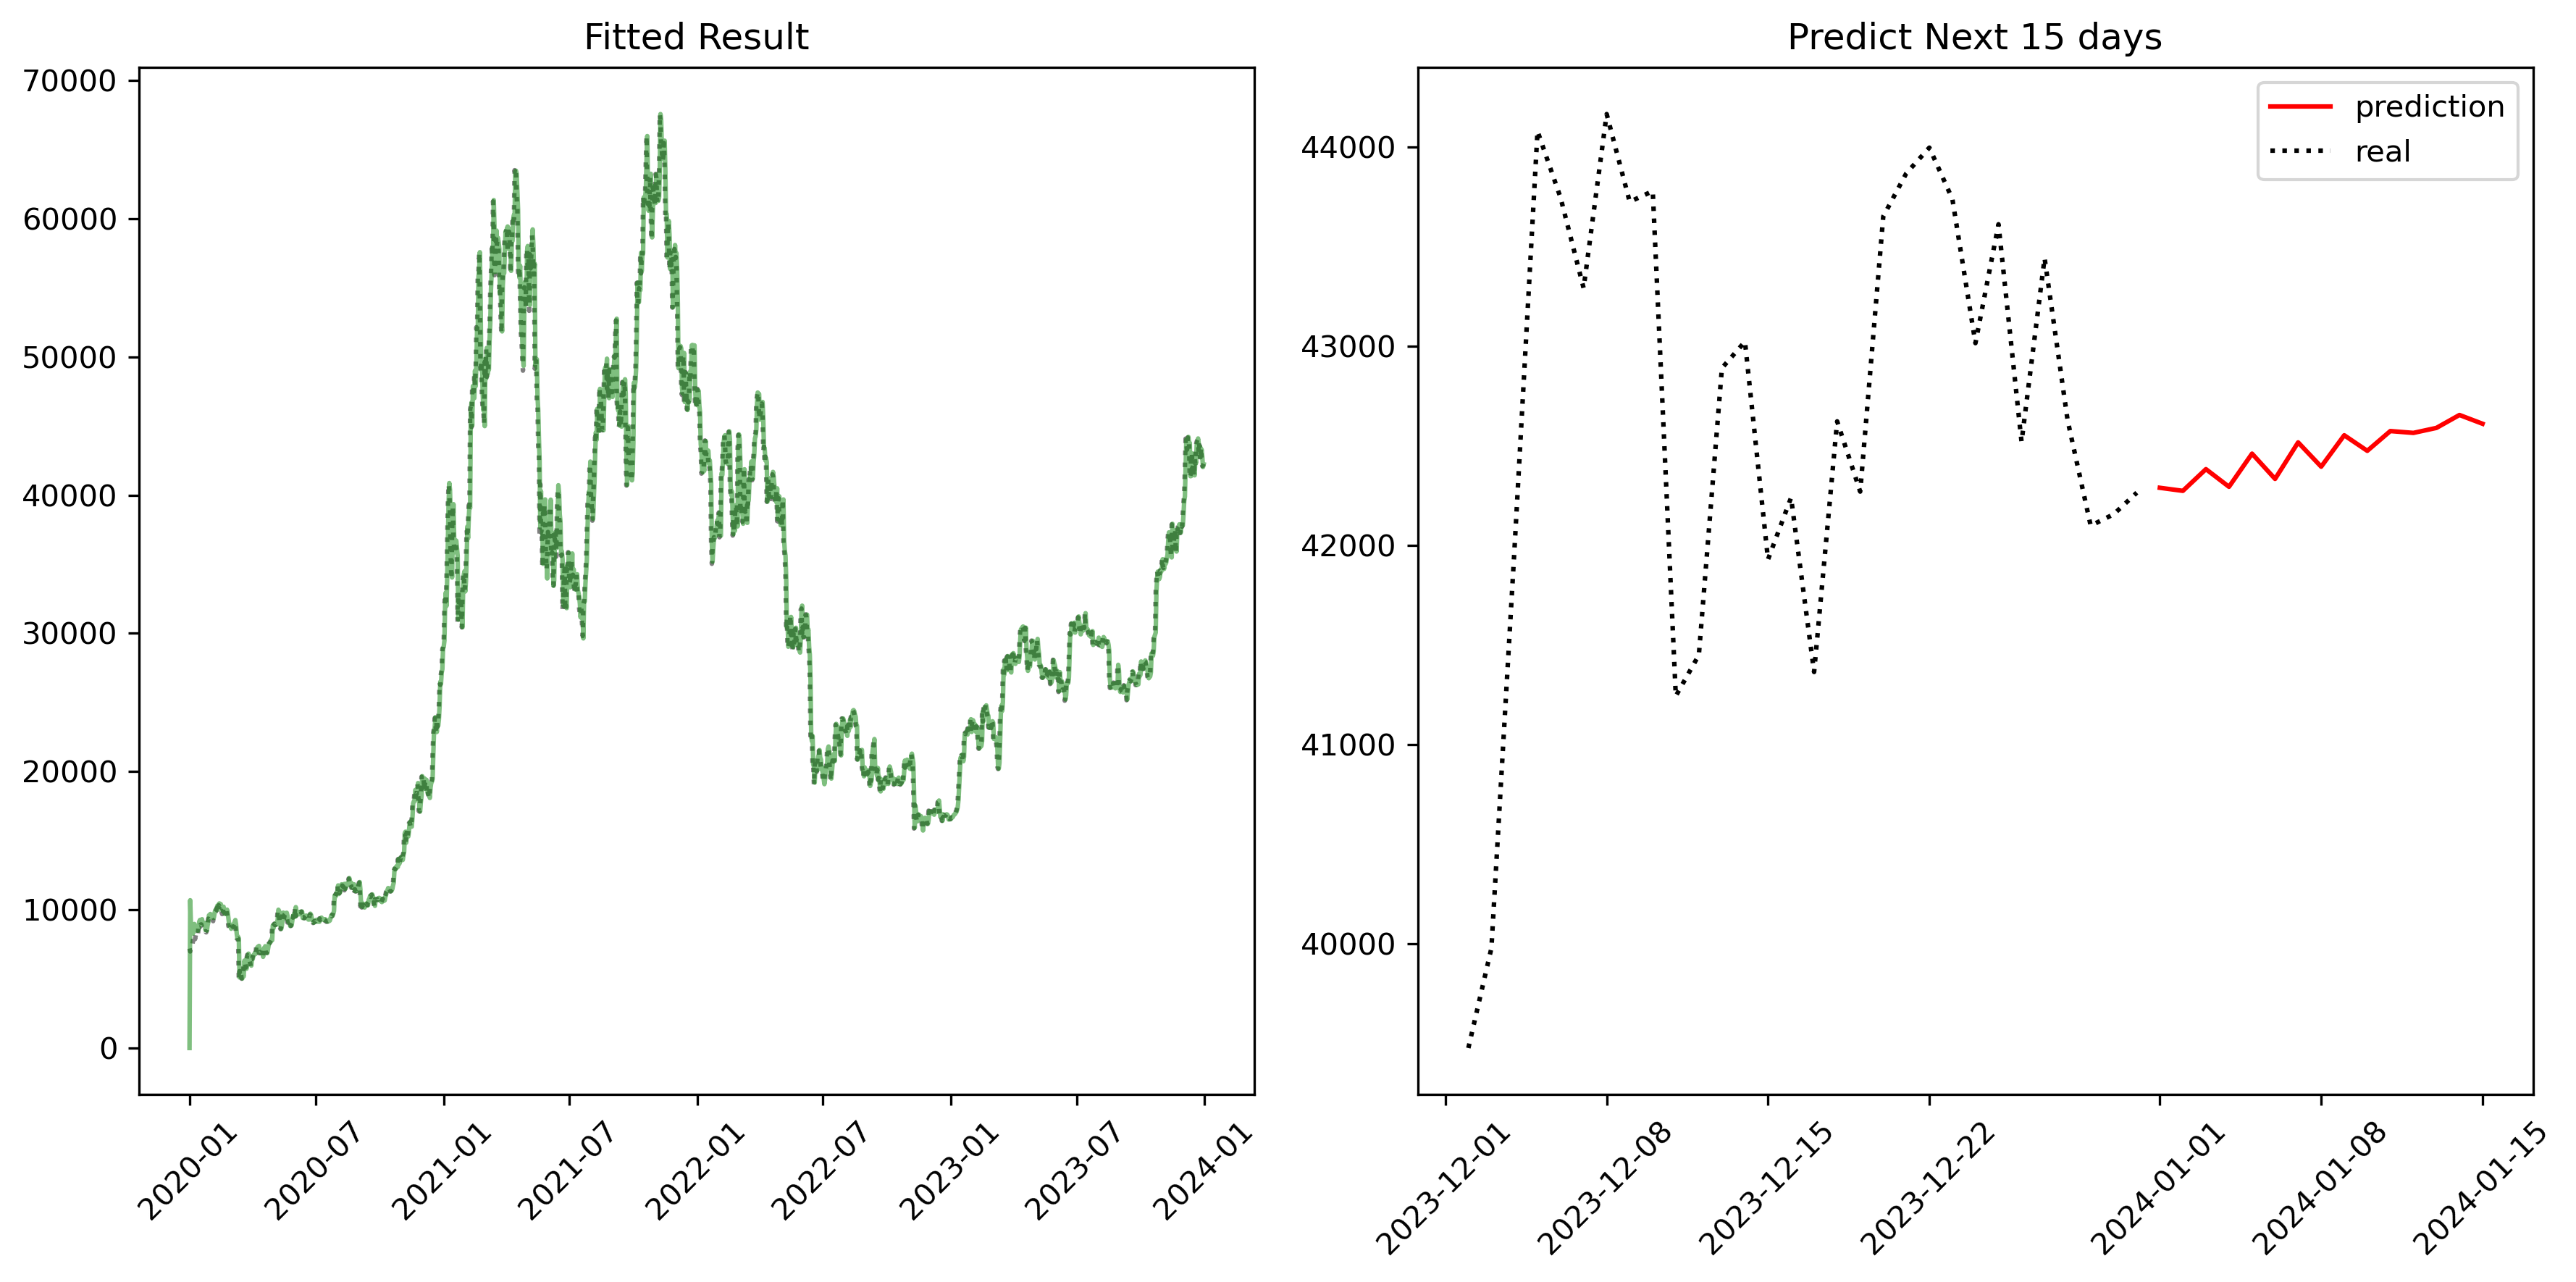

In [129]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.set_dpi(300)
 
# number of prediction days
n_futures = 15

freq = 'D'
future_idx = pd.date_range(data.index[-1], periods=n_futures+1, freq=freq)[-n_futures:]
 
forecast = arima_model.fittedvalues
forecast_futures = arima_model.forecast(steps=n_futures)

axes[0].plot(data.index, data, label='data', color='black', linestyle='dotted', alpha=0.5)
axes[0].plot(data.index, forecast, label='fitted', color='green', linestyle='solid', alpha=0.5)
axes[0].set_title('Fitted Result')
axes[0].set_xticklabels(mdates.num2date(axes[0].get_xticks()), rotation = 45)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

axes[1].plot(future_idx, forecast_futures, color='red', label='prediction')
axes[1].plot(data.index[-30:], data[-30:], color='black', linestyle='dotted', label='real')
axes[1].set_title(f'Predict Next {n_futures} days')
axes[1].set_xticklabels(mdates.num2date(axes[1].get_xticks()), rotation = 45)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## SARIMAX
### SARIMAX: Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors



### 주요 하이퍼파라미터

* AR(AutoRegressive): 이전 관측치의 값 을 사용하여 현재 값을 예측하는데 사용되는 모델입니다.

* I(Integrated): 시계열의 비정상성을 처리하기 위해 사용되는 차분(Differencing) 단계를 나타냅니다.

* MA(Moving Average): 이전 오차항의 평균 을 사용하여 현재 값을 예측하는데 사용되는 모델입니다.

* Seasonality: 계절성 요인 을 고려한 모델입니다. 예를 들어, 연간 패턴, 월간 패턴, 주간 패턴 등을 모델링 할 수 있습니다.

* Exogenous: 시계열에 영향을 주는 외부 변수 를 고려하는 모델입니다.

### ARIMA 모델은 AR, I, MA의 세 가지 구성요소만을 포함합니다. 따라서 계절성과 외생변수는 ARIMA 모델로는 처리하기 어렵습니다. 이 때문에 이러한 요소를 고려해야 하는 복잡한 시계열 데이터를 분석할 때는 ARIMA 보다는 SARIMAX와 같은 확장된 모델 을 사용하는 것이 적합할 수 있습니다.



### 즉, ARIMA와 SARIMAX의 주요 차이점은 SARIMAX가 ARIMA에 비해 계절성 과 외생변수를 모델링할 수 있다는 점입니다. 이로 인해 SARIMAX는 ARIMA보다 더 다양한 시계열 데이터를 분석할 수 있으며, 이에 따라 예측의 정확성을 높일 수 있습니다.

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

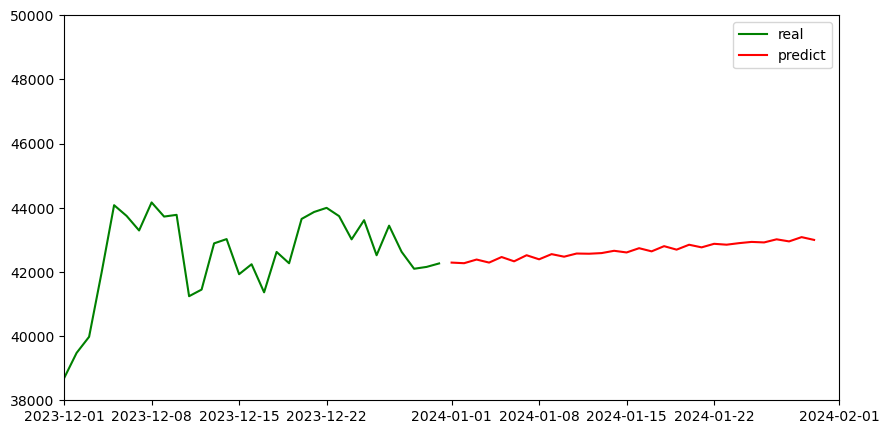

In [68]:
sarimax = SARIMAX(data, order=(2, 2, 3), season_order = (1, 1, 2, 14)).fit(disp=False)
forecast = sarimax.forecast(steps=30)

plt.figure(figsize=(10, 5))
plt.plot(data.index, data, label='real', color='green')
plt.plot(forecast, label='predict', color='red')
plt.xlim(pd.Timestamp('2023-12-01'), pd.Timestamp('2024-02-01'))
plt.ylim(38000, 50000)
plt.legend()
plt.show()

### Finance DataReader 라이브러리를 활용하여 금 선물가격 과 코스피 지수 데이터를 가져와서 병합하도록 하겠습니다.

In [70]:
# 금 선물
gold = fdr.DataReader('ZG')
# 금 선물 데이터 컬럼 변환
gold = gold['Close'].reset_index().rename(columns={'Close': 'Gold'})
gold

,Date,Gold
0,2011-07-20,11.153726
1,2011-07-21,10.352354
2,2011-07-22,10.685999
3,2011-07-25,11.100717
4,2011-07-26,11.359526
...,...,...
3174,2024-03-01,55.580002
3175,2024-03-04,55.369999
3176,2024-03-05,52.400002
3177,2024-03-06,54.029999


In [71]:
# 코스피 데이터
kospi = fdr.DataReader('KS11')
# 코스피 데이터 병합
kospi = kospi['Close'].reset_index().rename(columns={'Close': 'Kospi'})
kospi

,Date,Kospi
0,2001-06-11,608.23
1,2001-06-12,607.15
2,2001-06-13,614.05
3,2001-06-14,613.75
4,2001-06-15,618.96
...,...,...
5616,2024-03-04,2674.27
5617,2024-03-05,2649.40
5618,2024-03-06,2641.49
5619,2024-03-07,2647.62


In [72]:
# Kospi 데이터와 금값 시세 데이터 병합
kospi_gold = pd.merge(kospi, gold, how='left')
kospi_gold

,Date,Kospi,Gold
0,2001-06-11,608.23,NaN
1,2001-06-12,607.15,NaN
2,2001-06-13,614.05,NaN
3,2001-06-14,613.75,NaN
4,2001-06-15,618.96,NaN
...,...,...,...
5616,2024-03-04,2674.27,55.369999
5617,2024-03-05,2649.40,52.400002
5618,2024-03-06,2641.49,54.029999
5619,2024-03-07,2647.62,54.060001


### 병합한 데이터에서 결측치가 관측됩니다. 결측치를 interpolate() 으로 결측치를 채우도록 하겠습니다.

In [73]:
kospi_gold['Gold'] = kospi_gold['Gold'].interpolate().bfill()
kospi_gold['Kospi'] = kospi_gold['Kospi'].interpolate().bfill()
kospi_gold

,Date,Kospi,Gold
0,2001-06-11,608.23,11.153726
1,2001-06-12,607.15,11.153726
2,2001-06-13,614.05,11.153726
3,2001-06-14,613.75,11.153726
4,2001-06-15,618.96,11.153726
...,...,...,...
5616,2024-03-04,2674.27,55.369999
5617,2024-03-05,2649.40,52.400002
5618,2024-03-06,2641.49,54.029999
5619,2024-03-07,2647.62,54.060001


### data 와 kospi_gold 데이터를 병합합니다.

In [74]:
data_merged = pd.merge(data, kospi_gold, left_on=data.index, right_on=kospi_gold['Date'], how='left').drop('Date', axis=1)
data_merged = data_merged.rename(columns={'key_0': 'Date'})
data_merged

,Date,Close,Kospi,Gold
0,2020-01-01,7200.174316,NaN,NaN
1,2020-01-02,6985.470215,2175.17,45.000000
2,2020-01-03,7344.884277,2176.46,44.560001
3,2020-01-04,7410.656738,NaN,NaN
4,2020-01-05,7411.317383,NaN,NaN
...,...,...,...,...
1456,2023-12-27,43442.855469,2613.50,58.509998
1457,2023-12-28,42627.855469,2655.28,57.820000
1458,2023-12-29,42099.402344,NaN,NaN
1459,2023-12-30,42156.902344,NaN,NaN


In [75]:
# Gold, Kospi 의 결측치를 채웁니다.
data_merged['Gold'] = data_merged['Gold'].interpolate().bfill()
data_merged['Kospi'] = data_merged['Kospi'].interpolate().bfill()
data_merged

,Date,Close,Kospi,Gold
0,2020-01-01,7200.174316,2175.17,45.000000
1,2020-01-02,6985.470215,2175.17,45.000000
2,2020-01-03,7344.884277,2176.46,44.560001
3,2020-01-04,7410.656738,2169.33,44.516667
4,2020-01-05,7411.317383,2162.20,44.473334
...,...,...,...,...
1456,2023-12-27,43442.855469,2613.50,58.509998
1457,2023-12-28,42627.855469,2655.28,57.820000
1458,2023-12-29,42099.402344,2655.28,57.820000
1459,2023-12-30,42156.902344,2655.28,57.820000


### SARIMAX 모델로 학습하고, 예측 후 검증결과를 확인하기 위하여 데이터셋을 분할합니다.

*  30일 기준으로 분할하여, train 데이터로 학습된 모델로 test 데이터를 예측하도록 하겠습니다.

In [76]:
# train / test 분할
train_data = data_merged[:-30]
test_data = data_merged[-30:]

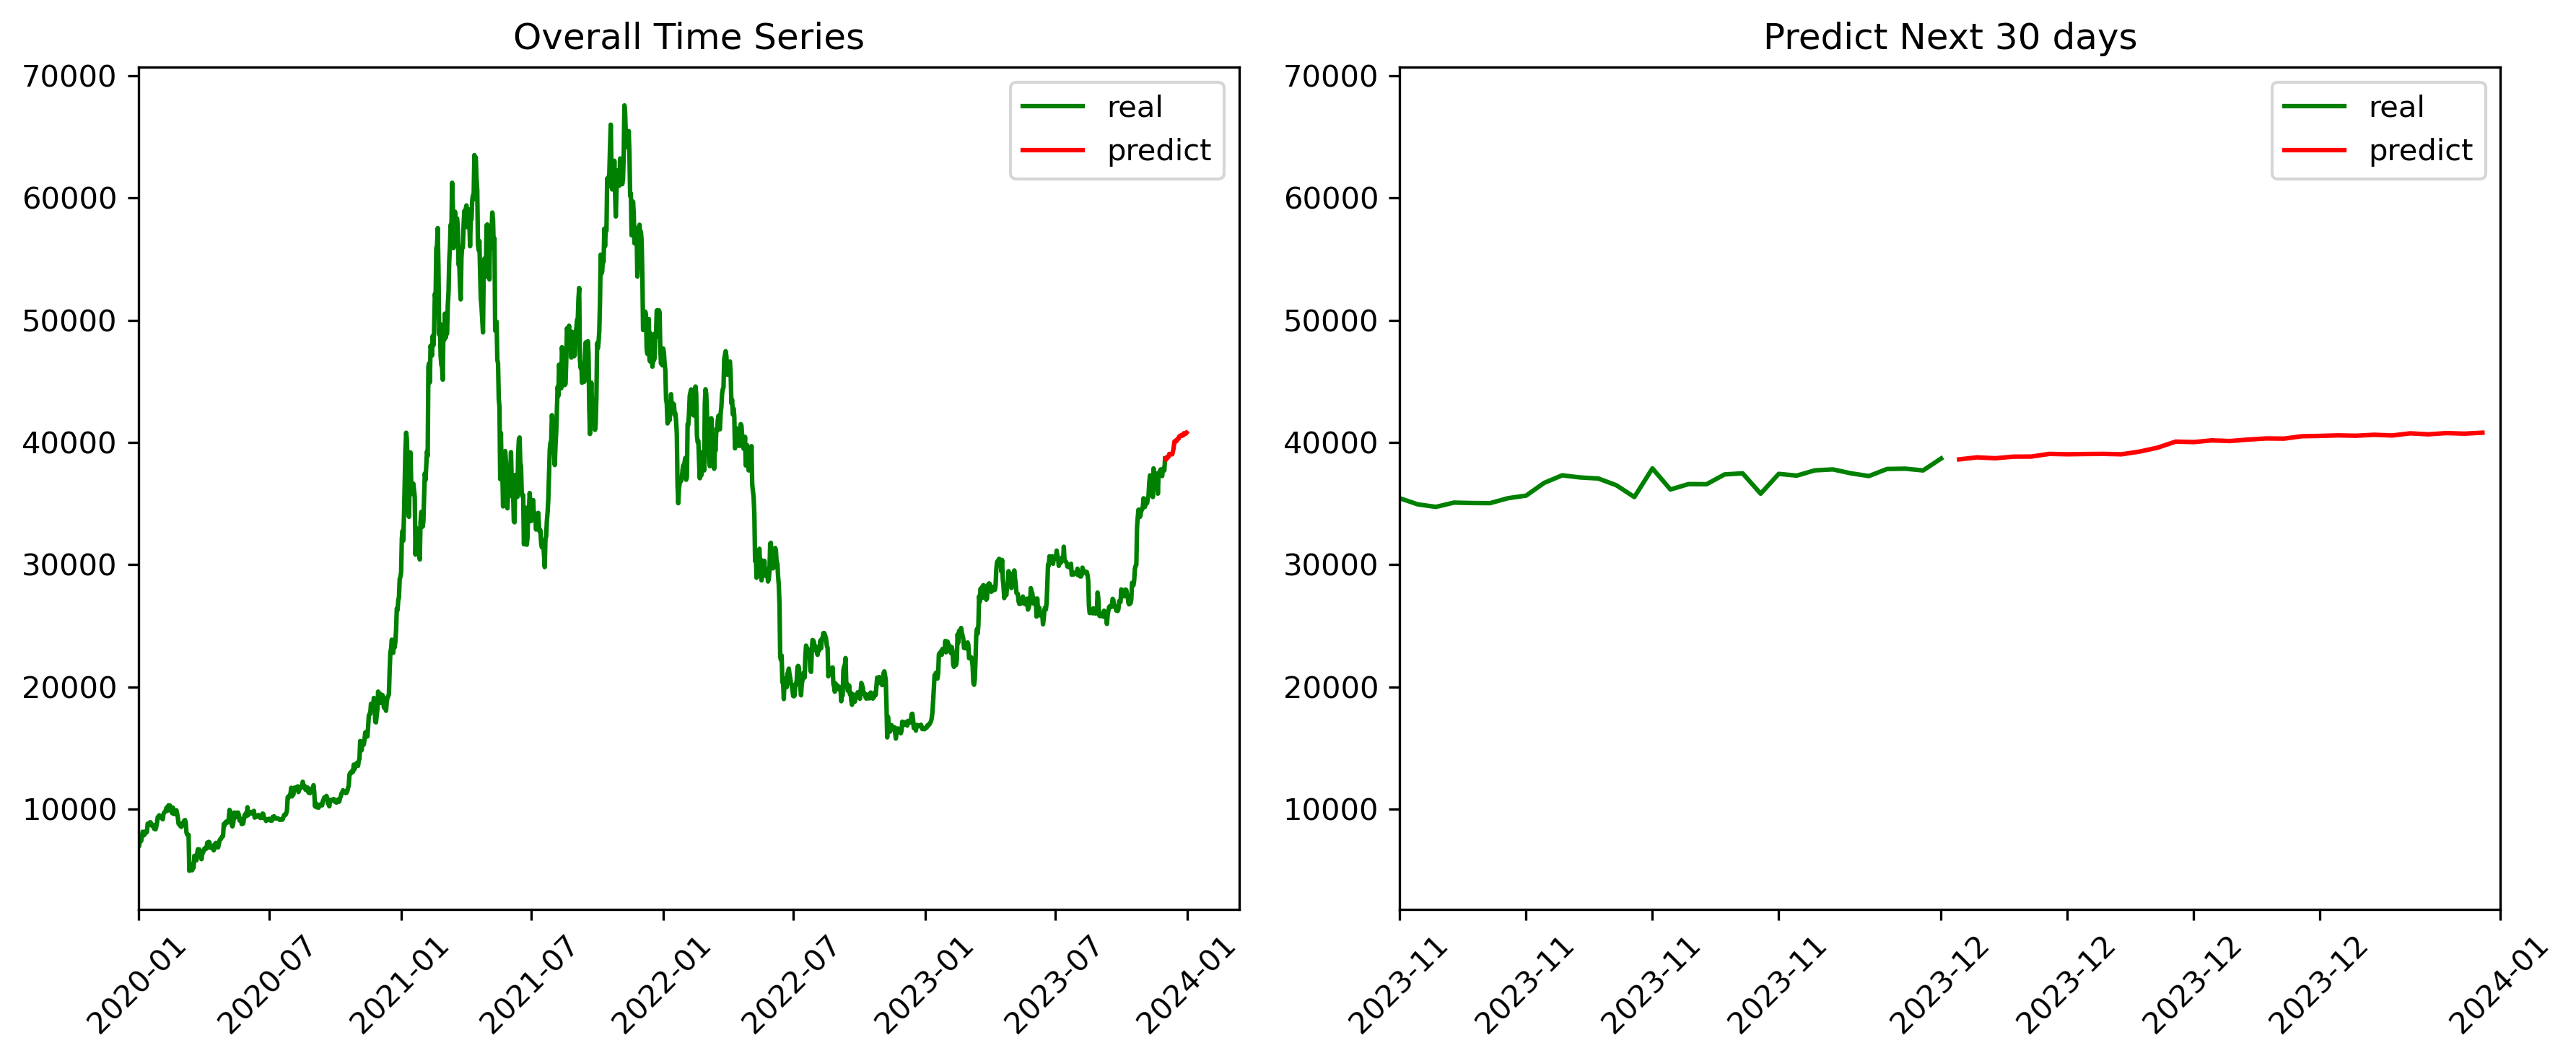

In [77]:
# 향후 30일의 데이터에 대한 예측
n_predictions = 30

sarimax = SARIMAX(train_data['Close'], 
                exog=train_data[['Gold', 'Kospi']], 
                order=(2, 2, 3), 
                season_order = (1, 1, 2, 14)).fit(disp=False)

forecast = sarimax.forecast(steps=30, exog=test_data[['Gold', 'Kospi']])

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.set_dpi(300)

axes[0].plot(train_data['Date'], train_data['Close'], label='real', color='green')
axes[0].plot(test_data['Date'], forecast, label='predict', color='red')
axes[0].set_xlim(pd.Timestamp('2020-01-01'), )
# Tick을 날짜형식으로 변환
axes[0].set_xticklabels(mdates.num2date(axes[0].get_xticks()), rotation = 45)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].set_title('Overall Time Series')
axes[0].legend()

axes[1].plot(train_data['Date'], train_data['Close'], label='real', color='green')
axes[1].plot(test_data['Date'], forecast, label='predict', color='red')
axes[1].set_xlim(pd.Timestamp('2023-11-01'), pd.Timestamp('2024-01-01'))
# Tick을 날짜형식으로 변환
axes[1].set_xticklabels(mdates.num2date(axes[1].get_xticks()), rotation = 45)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].set_title(f'Predict Next {n_predictions} days')
axes[1].legend()

plt.tight_layout()
plt.legend()
plt.show()

### SARIMAX 하이퍼파라미터 튜닝

In [78]:
p = range(0, 5)  # AR
d = range(1, 3)  # 차분
q = range(0, 4)  # MA
m = 30           # 계절성 주기(Seasonal Trends)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(train_data['Close'], 
                                exog=train_data[['Gold', 'Kospi']], 
                                order=(i), 
                                season_order = (j)).fit(disp=False)
                aic.append(round(model.aic, 2))
                params.append((i,j))
            except:
                print('Error Occured..')
                continue

100%|██████████████████████████████████| 1600/1600 [21:27<00:00,  1.24it/s]


In [83]:
optimal

[(((2, 2, 3), (0, 1, 0, 30)), 24162.68),
 (((2, 2, 3), (0, 1, 1, 30)), 24162.68),
 (((2, 2, 3), (0, 1, 2, 30)), 24162.68),
 (((2, 2, 3), (0, 1, 3, 30)), 24162.68),
 (((2, 2, 3), (0, 2, 0, 30)), 24162.68),
 (((2, 2, 3), (0, 2, 1, 30)), 24162.68),
 (((2, 2, 3), (0, 2, 2, 30)), 24162.68),
 (((2, 2, 3), (0, 2, 3, 30)), 24162.68),
 (((2, 2, 3), (1, 1, 0, 30)), 24162.68),
 (((2, 2, 3), (1, 1, 1, 30)), 24162.68),
 (((2, 2, 3), (1, 1, 2, 30)), 24162.68),
 (((2, 2, 3), (1, 1, 3, 30)), 24162.68),
 (((2, 2, 3), (1, 2, 0, 30)), 24162.68),
 (((2, 2, 3), (1, 2, 1, 30)), 24162.68),
 (((2, 2, 3), (1, 2, 2, 30)), 24162.68),
 (((2, 2, 3), (1, 2, 3, 30)), 24162.68),
 (((2, 2, 3), (2, 1, 0, 30)), 24162.68),
 (((2, 2, 3), (2, 1, 1, 30)), 24162.68),
 (((2, 2, 3), (2, 1, 2, 30)), 24162.68),
 (((2, 2, 3), (2, 1, 3, 30)), 24162.68),
 (((2, 2, 3), (2, 2, 0, 30)), 24162.68),
 (((2, 2, 3), (2, 2, 1, 30)), 24162.68),
 (((2, 2, 3), (2, 2, 2, 30)), 24162.68),
 (((2, 2, 3), (2, 2, 3, 30)), 24162.68),
 (((2, 2, 3), (3

In [81]:
# 향후 30일의 데이터에 대한 예측
n_predictions = 30

In [91]:
optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]

sarimax_tunned = SARIMAX(train_data['Close'], 
                         exog=train_data[['Gold']], 
                         order = optimal[0][0][0], 
                         seasonal_order = optimal[0][0][1]).fit(disp=False)

sarimax_tunned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1431
Model:             SARIMAX(2, 2, 3)x(0, 1, [], 30)   Log Likelihood              -12290.024
Date:                             Fri, 08 Mar 2024   AIC                          24594.049
Time:                                     12:22:40   BIC                          24630.753
Sample:                                          0   HQIC                         24607.770
                                            - 1431                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gold          80.4326     10.721      7.502      0.000      59.419     101.446
ar.L1         -1.5654      0.010   -156.581      0.000      -1.585      -1.546
ar.L2         -0.9258      0.010    -88.184      0.000      -0.946      -0.905
ma.L1          0.6204     22.494      0.028      0.978     -43.468      44.709
ma.L2         -0.6204     22.494     -0.028      0.978     -44.708      43.467
ma.L3         -1.0000      0.026    -38.454      0.000      -1.051      -0.949
sigma2      2.815e+06   2.09e-05   1.34e+11      0.000    2.81e+06    2.81e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):               767.27
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.25e+28. Standard errors may be unstable.
"""

In [92]:
sarimax_tunned.forecast(steps=n_predictions, exog=test_data[['Gold']])

1431    37827.000572
1432    37699.008084
1433    38163.891866
1434    37836.561899
1435    38366.172968
1436    38426.693191
1437    38831.880975
1438    40012.770079
1439    40322.132897
1440    40512.460472
1441    40255.360026
1442    40295.243468
1443    39357.691354
1444    41484.934668
1445    40065.760265
1446    40364.148105
1447    40529.097486
1448    41478.156092
1449    41296.424041
1450    40103.841267
1451    41401.448311
1452    41371.191942
1453    41781.647647
1454    41695.746744
1455    41540.954176
1456    41155.980017
1457    41741.407524
1458    41729.806525
1459    41586.855486
1460    42540.712794
Name: predicted_mean, dtype: float64

### 예측 결과 시각화

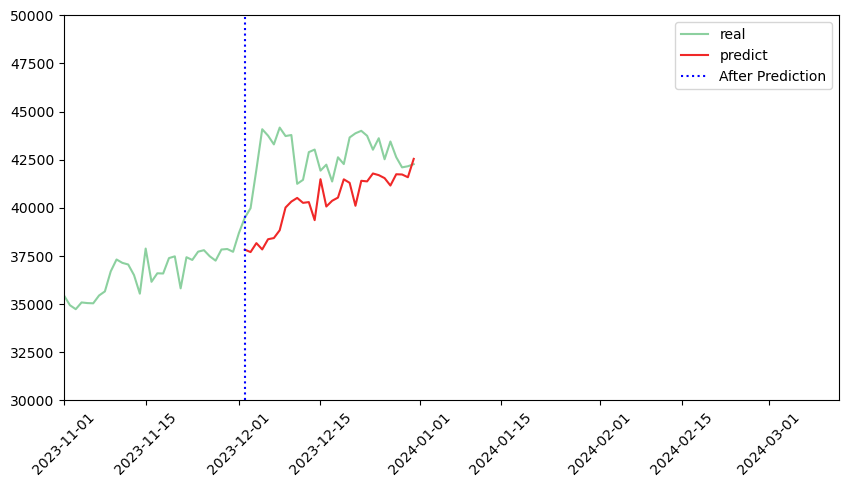

In [94]:
forecast = sarimax_tunned.forecast(steps=n_predictions, exog=test_data[['Gold']])

plt.figure(figsize=(10, 5))
plt.plot(data.index, data, label='real', color='#1AA341', alpha=0.5)
plt.plot(test_data['Date'], forecast, label='predict', color='#F02828')
plt.axvline(x = pd.Timestamp('2023-12-02'), color = 'blue', label = 'After Prediction', linestyle='dotted')
plt.xlim(pd.Timestamp('2023-11-01'), )
plt.ylim(30000, 50000)
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 시계열 성분 분해 (Seasonal Decomposition)
### 시계열 데이터 분석에서 성분 분해(Decomposition)는 관측된 시계열 데이터를 여러 성분으로 나누는 것을 의미합니다. 이는 시계열 데이터에 있는 복잡한 패턴을 이해하고 분석하는 데 도움이 됩니다. 주로 데이터를 추세(Trend), 계절성(Seasonality), 그리고 잔차(Redisual)/불규칙성(Irregularity) 으로 분해합니다.

* 추세 성분(Trend Component) : 이는 시계열 데이터의 장기적인 패턴 을 의미합니다. 예를 들어, 회사의 매출이 시간이 지남에 따라 전반적으로 증가하거나 감소하는 경향이 있다면, 이를 추세라고 합니다. 추세는 일반적으로 선형적일 수도 있고, 비선형적일 수도 있습니다.

* 계절 성분(Seasonal Component) : 이는 시계열 데이터에서 반복적으로 나타나는 패턴 을 의미합니다. 예를 들어, 매년 여름에 아이스크림 판매가 증가하는 것이 계절성의 예입니다. 계절성은 일반적으로 연간, 분기별, 월별, 주별, 일별 등 주기적으로 나타납니다.

* 불규칙 성분(Irregular Component) : 이는 추세나 계절성에 의해 설명되지 않는 잔차(Residual) 를 의미합니다. 불규칙성은 랜덤 노이즈일 수도 있고, 데이터에 있는 예측 불가능한 변동성일 수도 있습니다. 예를 들어, 예측할 수 없는 이벤트(자연재해, 금융위기 등)에 의한 판매량의 변동이 이에 해당됩니다.

### additive 방식을 활용한 분해
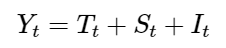



* 시계열 데이터가 선형적인 형태 라는 가정하에 데이터를 분해합니다.

* 즉, 데이터에서의 추세, 계절성, 그리고 잔차가 더해져 원래의 시계열 데이터를 구성한다는 가정입니다.

### 이는 시계열 데이터의 계절적 효과가 시간이 흐름에 따라 일정하게 유지되는 경우에 적합합니다.

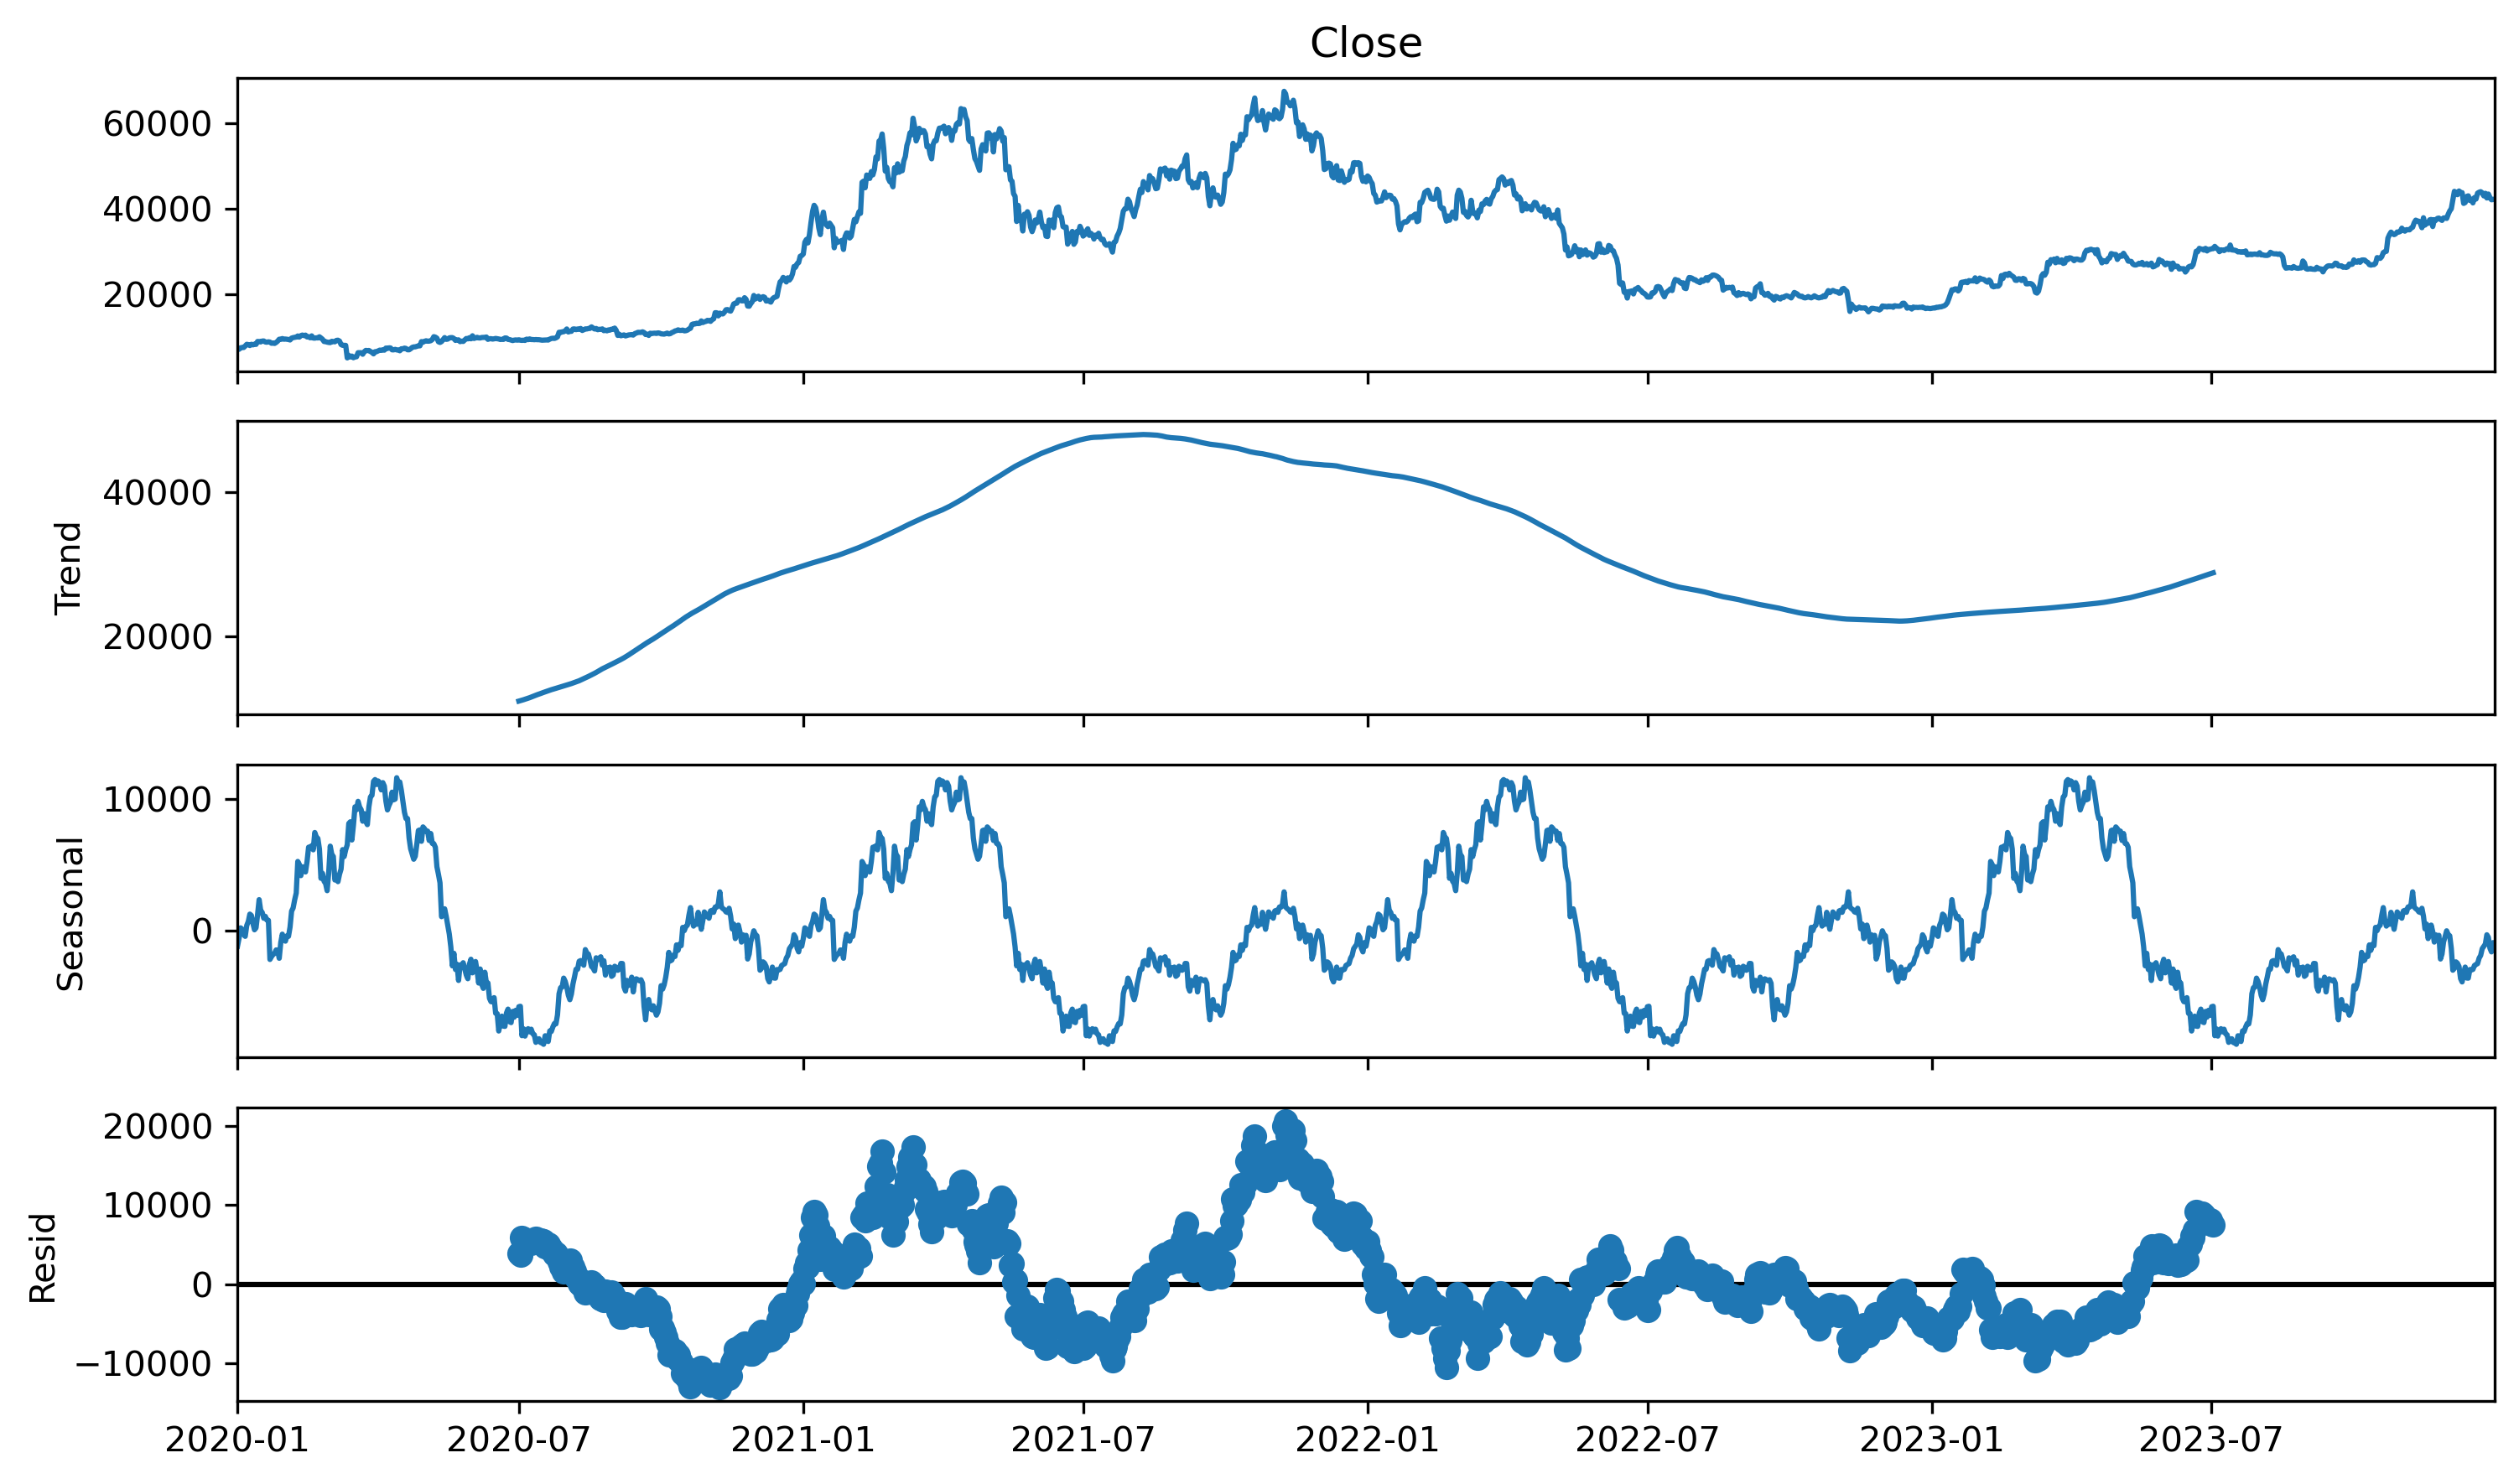

In [33]:
import statsmodels.api as sm

# additive 방식을 활용한 분해
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=365)
fig = decomposition.plot()
fig.set_dpi(300)
fig.set_tight_layout('constrained')
fig.set_size_inches(10, 6)
plt.show()

## Multiplicative Model
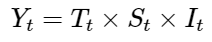



### 이 모델은 세 가지 성분이 곱해져서 시계열 데이터를 구성한다고 가정합니다

* 시계열 데이터가 비선형적인 형태, 특히 시간이 지남에 따라 계절적 효과가 증가하거나 감소하는 경우에 적합합니다.

* 즉, 데이터에서의 추세, 계절성, 그리고 잔차가 곱해져 원래의 시계열 데이터를 구성한다는 가정입니다.

### (주의) multiplicative 모델을 사용하기 위해서는 데이터에 0이 존재해서는 안됩니다.

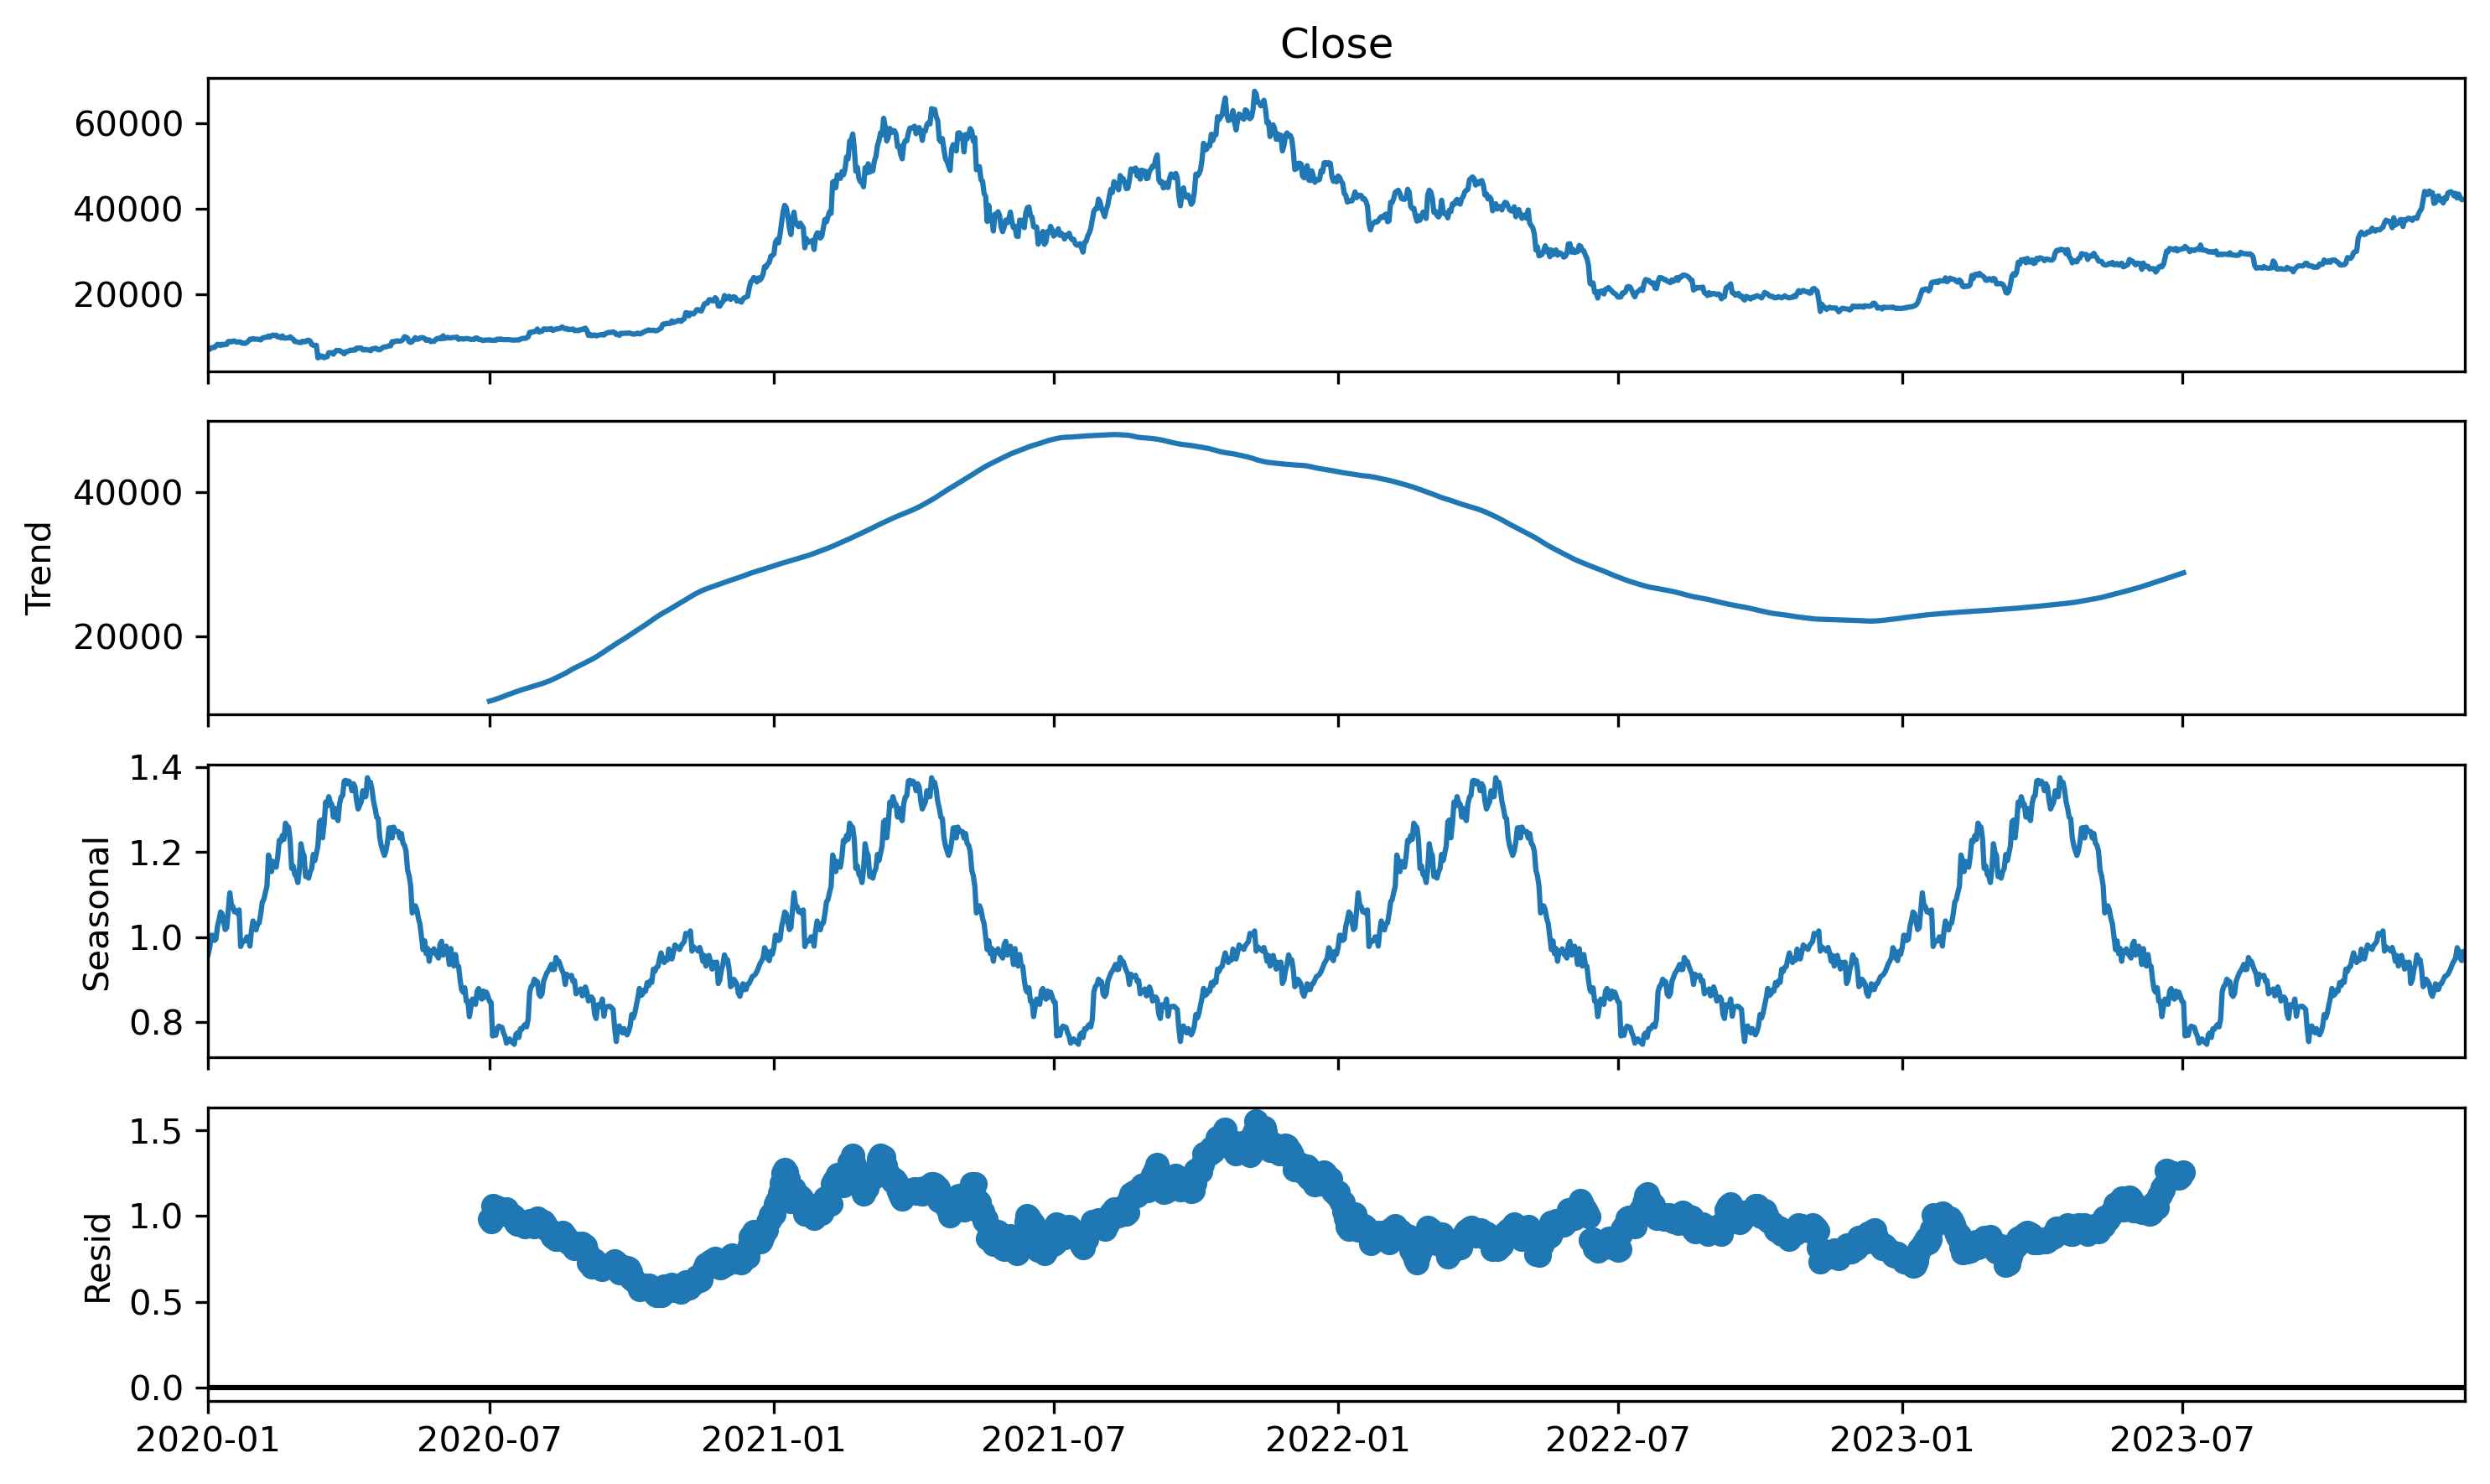

In [107]:
decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_dpi(300)
fig.set_tight_layout('constrained')
fig.set_size_inches(10, 6)
plt.show()

### additive 와 multiplicative의 차이
### additive 모델은 시간에 따라 빈도와 진폭이 변하지 않는다는 점에 유의하세요.

### multiplicative 모델은 이 두 번째 모델에서 행동이 증가하는 깔때기 역할을 합니다(감소할 수도 있음).

* additive 는 Trend 와 Seasonality 를 별개로 보고,

* multiplicative 는 Trend 에 따라 Seasonality 도 변화한다고 보면 됩니다.

### 따라서 데이터의 계절적 패턴의 크기가 데이터의 크기에 따라 달라지는 경우 multiplicative 모델을 사용합니다. 반면, additive 모델에서는 계절성의 크기가 시간에 따라 변하지 않습니다.

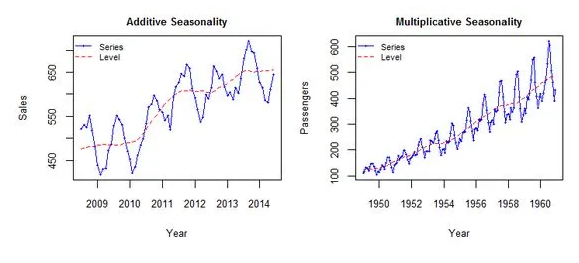